In [1]:
positions = []
actions = []
firstHalfaveragePositions = {}
secondHalfaveragePositions = {}
teamPassesListFirstHalf = {}
teamPassesListSecondHalf = {}
teamPassesNet = {}
chancesPerGameFirstMTA = {}
chancesPerGameSecondMTA = {}
chancesPerGameFirstOpponent = {}
chancesPerGameSecondOpponent = {}
averageBetweennesFirstHalf = {}
averageBetweennesSecondHalf = {}
averageDegreeFirstHalf = {}
averageDegreeSecondHalf = {}
averageClosenesFirstHalf = {}
averageClosenesSecondHalf = {}
firstHalfpositionExists = False
secondHalfpositionExists = False
averagePlayersBetweenesFirsrHalf = {}
averagePlayersBetweenesSecondHalf = {}
averagePlayersDegreeFirstHalf = {}
averagePlayersDegreeSecondHalf = {}
totalBetweeennessFirstHalf = {}
totalBetweennessSecondHalf = {}
totalBetweennessFirstHalf = {}
totalDegreeFirstHalf = {}
totalDegreeSecondHalf = {}
betweenneesDifferenceFirstHalf = {}
betweenneesDifferenceSecondHalf = {}
playersDistanceFromAveregeBetwenneessFirstHalf = {}
playersDistanceFromAveregeBetwenneessSecondHalf = {}



In [2]:
# create passes network
def createNetwork(teamPassesList, half, file):
    passesCount = 0
    totalPasses = 0
# create nodes for team players
    for key, value in teamPassesList.items():
        teamPassesNet[key] = {}

# add connections between nodes
    for key, value in teamPassesList.items():
        for key1, value1 in teamPassesNet.items():
            if key1 == key:
                for player in value:
                    passesCount = passesCount + 1
                    value1[player] = 0
                totalPasses = totalPasses + passesCount
                passesCount = 0

# add Weight between the nodes
    for key1, value1 in teamPassesNet.items():
        for key, value in teamPassesList.items():
            if key1 == key:
                for player in value:
                    for playerPasses in value1:
                        if player == playerPasses:
                            value1[player] = value1[player] + 1

# create network visualization
    G = nx.Graph()
    lastName = ''
    for key, value in teamPassesNet.items():
        if key != None: 
            for playerName in value:
                if  playerName != None:
                    lastName = key
                    lastName = str.split(lastName)
                    playerLastName = str.split(playerName)
                    G.add_edge(lastName[-1], playerLastName[-1], weight=value[playerName])

    ebiggest = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 10]
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if 5 < d["weight"] < 10]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 5]

    pos = nx.spring_layout(G)  # positions for all nodes

# nodes
    nx.draw_networkx_nodes(G, pos, node_size=350, node_color='skyblue')

# edges
    nx.draw_networkx_edges(G, pos, edgelist=ebiggest, width=0.5)
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=0.5, edge_color="magenta")
    nx.draw_networkx_edges(G, pos, edgelist=esmall, width=0.5, alpha=0.5, edge_color="b", style="dashed")

# labels
    nx.draw_networkx_labels(G, pos, font_size=5, font_family="Comic Sans MS")
    plt.axis("off")
    plt.show()
    teamPassesList.clear()
    teamPassesNet.clear()
    return G


In [3]:
#calculate betweenness
def betweennes(G, halfName, gameNum):
    betweenness=nx.betweenness_centrality(G)
#avverage betweenneses per half
    filtered_vals = [v for _, v in betweenness.items()]
    averageBetweeneess = sum(filtered_vals) / len(filtered_vals)
#find the distance from the average betweenness
    distanceFromAveregeBetweenness = 0
    for player,bet in betweenness.items():
        if averageBetweeneess > bet:
            distanceFromAveregeBetweenness = distanceFromAveregeBetweenness + (averageBetweeneess - bet)
        if averageBetweeneess < bet:
            distanceFromAveregeBetweenness = distanceFromAveregeBetweenness + (bet -averageBetweeneess)
            
    if halfName == 'FirstHalf':
        betweenneesDifferenceFirstHalf[gameNum] = averageBetweeneess
        for key,value in betweenness.items():
            if key not in averagePlayersBetweenesFirsrHalf:
                averagePlayersBetweenesFirsrHalf[key] = [value]
            else:
                averagePlayersBetweenesFirsrHalf[key].append(value)
    if halfName == 'SecondHalf':
        betweenneesDifferenceSecondHalf[gameNum] = averageBetweeneess
        for key,value in betweenness.items():
            if key not in averagePlayersBetweenesSecondHalf:
                averagePlayersBetweenesSecondHalf[key] = [value]
            else:
                averagePlayersBetweenesSecondHalf[key].append(value)

    for player, bet in betweenness.items():
        if halfName == 'FirstHalf':
            playersDistanceFromAveregeBetwenneessFirstHalf[player] = bet - betweenneesDifferenceFirstHalf.get(gameNum)
        if halfName == 'SecondHalf':
            playersDistanceFromAveregeBetwenneessSecondHalf[player] = bet - betweenneesDifferenceSecondHalf.get(gameNum)

#sort betweenes dictionary 
    marklistbetweenes = sorted(betweenness.items(), key=lambda x:x[1], reverse=True)
    betweenness = dict(marklistbetweenes)
#generate betweenness graph
    myList = betweenness.items()
    x, y = zip(*myList)
    plt.figure(figsize=(18, 6))
    plt.plot(x, y)
    plt.xlabel('Players')

    plt.ylabel('betweenness')
    plt.title('Game ' + str(gameNum) + ' ' + str(halfName))
    plt.show()


In [4]:
#find players degree
def degree(G, halfName, gameNum):
    degrees=nx.degree_centrality(G)
#avverage degrees per half
    filtered_vals = [v for _, v in degrees.items()]
    if halfName == 'FirstHalf':
        for key,value in degrees.items():
            if key not in averagePlayersDegreeFirstHalf:
                averagePlayersDegreeFirstHalf[key] = [value]
            else:
                averagePlayersDegreeFirstHalf[key].append(value)
    if halfName == 'SecondHalf':
        for key,value in degrees.items():
            if key not in averagePlayersDegreeSecondHalf:
                averagePlayersDegreeSecondHalf[key] = [value]
            else:
                averagePlayersDegreeSecondHalf[key].append(value)
#sort degrees dictionary 
    marklistDegree = sorted(degrees.items(), key=lambda x:x[1], reverse=True)
    degreess = dict(marklistDegree)
#generate degrees graph
    myList = degreess.items()
    x, y = zip(*myList)
    plt.figure(figsize=(18, 6))
    plt.plot(x, y)
    plt.xlabel('Players')
    plt.ylabel('degrees')
    plt.title('Game ' + str(gameNum) + ' ' + str(halfName))
    plt.show()

In [5]:
#closnes
def closenes(G,halfName, gameNum):
    closnes = nx.closeness_centrality(G)
    marklist = sorted(closnes.items(), key=lambda x:x[1], reverse=True)
    sortClosnes = dict(marklist)
#average closenes per half
    filtered_vals = [v for _, v in sortClosnes.items()]
    average = sum(filtered_vals) / len(filtered_vals)
    if halfName == 'FirstHalf':
        averageClosenesFirstHalf[str(gameNum)] = average
    else:
        averageClosenesSecondHalf[str(gameNum)] = average


    myList = sortClosnes.items()
    x, y = zip(*myList)
    plt.figure(figsize=(18, 6))
    plt.plot(x, y)
    plt.xlabel('Players')
    plt.ylabel('Closeness')
    plt.title(str(gameNum))
    plt.savefig("Closeness"+ halfName + gameNum +".png",dpi=1900)
    plt.show()


In [6]:
import math
import statistics

def euclidean(x,y,x_des,y_des):
    square_x=(x-x_des)**2
    square_y=(y-y_des)**2
    return math.sqrt(square_x+square_y)
    

#iterate over original data for check and create passes dataset
def organizeData(root, gameNum):

    numOfPrints = 0
    num1 = 0
    exists1 = False
    exists2 = False
    firstHalfChancesMTLV = 0
    secondHalfChancesMTLV = 0
    firstHalfChancesOpponent = 0
    secondHalfChancesMTLVOpponent = 0
    firstHalfMTAChancesSeason = 0
    secondHalfMTAChancesSeason = 0
    firstHalfOpponentChancesSeason = 0
    secondHalfOpponentChancesSeason = 0

    # x coordinate of source of pass
    x_positions=[]
    
    # y coordinate of source of pass
    y_positions=[]
    
    # X coordinate of destination of pass
    x_positions_des=[]
    
    # y coordinate of destination of pass
    y_positions_des=[]
    distances=[]
    for child in root:
        x_pos=child.attrib.get('pos_x005F_x')
        y_pos=child.attrib.get('pos_y')
        x_pos_des=child.attrib.get('pos_dest_x005F_x')
        y_pos_des=child.attrib.get('pos_dest_y')
        
        #Checking if any of the coordinates equals None
        has_none=x_pos is None
        has_none=has_none or y_pos is None
        has_none=has_none or x_pos_des is None
        has_none=has_none or y_pos_des is None
        
        #If none of the coordinates equals None they are added to corresponding list
        if not has_none:
            x_positions.append(float(x_pos))
            y_positions.append(float(y_pos))
            x_positions_des.append(float(x_pos_des))
            y_positions_des.append(float(y_pos_des))
            distances.append(euclidean(float(x_pos),float(y_pos),float(x_pos_des),float((y_pos_des))))
            
            
            
        if child.attrib.get('action_name') == 'Chances created' and child.attrib.get('team_name') == 'Maccabi Tel Aviv' and child.attrib.get('half') == '1':
            firstHalfChancesMTLV = firstHalfChancesMTLV + 1
        elif child.attrib.get('action_name') == 'Chances created' and child.attrib.get('team_name') == 'Maccabi Tel Aviv' and child.attrib.get('half') == '2':
            secondHalfChancesMTLV = secondHalfChancesMTLV + 1
        elif child.attrib.get('action_name') == 'Chances created' and child.attrib.get('team_name') != 'Maccabi Tel Aviv' and child.attrib.get('half') == '1':
            firstHalfChancesOpponent = firstHalfChancesOpponent + 1
        elif child.attrib.get('action_name') == 'Chances created' and child.attrib.get('team_name') != 'Maccabi Tel Aviv' and child.attrib.get('half') == '2':
            secondHalfChancesMTLVOpponent = secondHalfChancesMTLVOpponent + 1

        positions.append(child.attrib.get('position_name'))
        if child.attrib.get('action_name') not in actions:
            actions.append(child.attrib.get('action_name'))
# create dictionary of lists with all passes during the game for first half
        if child.attrib.get('team_name') == 'Maccabi Tel Aviv' and child.attrib.get('possession_team_name') == 'Maccabi Tel Aviv' and child.attrib.get('opponent_team_name') == 'Maccabi Tel Aviv':
            if child.attrib.get('half') == '1':
                for i in teamPassesListFirstHalf:
#check if player exists
                 if (i == child.attrib.get('player_name')):
                    exists1 = True
#if not, create
                if exists1 == False:
                    teamPassesListFirstHalf[child.attrib.get('player_name')]=[(child.attrib.get('opponent_name'))]
#if yes, add players to list
                if exists1 == True:
                    teamPassesListFirstHalf[child.attrib.get('player_name')].append((child.attrib.get('opponent_name')))
                    exists1 = False
            elif child.attrib.get('half') == '2':
                for i in teamPassesListSecondHalf:
# check if player exists
                    if (i == child.attrib.get('player_name')):
                        exists2 = True
# if not, create
                if exists2 == False:
                    teamPassesListSecondHalf[child.attrib.get('player_name')] = [(child.attrib.get('opponent_name'))]
# if yes, add players to list
                if exists2 == True:
                    teamPassesListSecondHalf[child.attrib.get('player_name')].append((child.attrib.get('opponent_name')))
                    exists2 = False
    
    #Printing the mean of the distancesof passes
    print("The mean is "+str(statistics.mean(distances)))
    chancesPerGameFirstMTA[str(gameNum)] = firstHalfChancesMTLV
    chancesPerGameSecondMTA[str(gameNum)] = secondHalfChancesMTLV
    chancesPerGameFirstOpponent[str(gameNum)] = firstHalfChancesOpponent
    chancesPerGameSecondOpponent[str(gameNum)] = secondHalfChancesMTLVOpponent


In [7]:
#Louvain Community Detection
def Louvain(G):

#first compute the best partition
    partition = community_louvain.best_partition(G)
    
# compute the best partition
    partition = community_louvain.best_partition(G)
    communities = []
    for key,value in partition.items():
        if value not in communities:
            communities.append(value)
    
    print("Number of communities: " + str(len(communities)))
# draw the graph
    pos = nx.spring_layout(G)
# color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
# labels
    nx.draw_networkx_labels(G, pos, font_size=9, font_family="Comic Sans MS")
    plt.show()


In [8]:
#compute Average Betweenneess and Degree for evry player during the season
def computeAverageBetweennessFirstHalf(averagePlayersBetweenesFirsrtHalf):
    counter = 0
    numOfGames = 0
    for key, value in averagePlayersBetweenesFirsrHalf.items():
        for number in value:
            numOfGames = numOfGames + 1
            counter = counter + number
        totalBetweennessFirstHalf[key] = counter / numOfGames
        numOfGames = 0
        counter = 0
    
def computeAverageBetweennessSecondHalf(averagePlayersBetweenesSecondHalf):
    counter = 0
    numOfGames = 0
    for key, value in averagePlayersBetweenesSecondHalf.items():
        for number in value:
            numOfGames = numOfGames + 1
            counter = counter + number
        totalBetweennessSecondHalf[key] = counter / numOfGames
        numOfGames = 0
        counter = 0

def computeAverageDegreeFirstHalf(averagePlayersDegreeFirsrtHalf):
    counter = 0
    numOfGames = 0
    for key, value in averagePlayersDegreeFirsrtHalf.items():
        for number in value:
            numOfGames = numOfGames + 1
            counter = counter + number
        totalDegreeFirstHalf[key] = counter / numOfGames
        numOfGames = 0
        counter = 0
    
def computeAverageDegreeSecondHalf(averagePlayersDegreeSecondHalf):
    counter = 0
    numOfGames = 0
    for key, value in averagePlayersDegreeSecondHalf.items():
        for number in value:
            numOfGames = numOfGames + 1
            counter = counter + number
        totalDegreeSecondHalf[key] = counter / numOfGames
        numOfGames = 0
        counter = 0
            
        

In [9]:
def GenereateSeasoneBetweennessGraph(G,half):
#sort betweenes dictionary 
    marklistbetweenes = sorted(G.items(), key=lambda x:x[1], reverse=True)
    betweenness = dict(marklistbetweenes)
#generate betweenness graph
    myList = betweenness.items()
    x, y = zip(*myList)
    plt.figure(figsize=(26, 6))
    plt.plot(x, y)
    plt.xlabel('Players')

    plt.ylabel('betweenness')
    plt.title("Full season " + half +" betweenness")
    plt.show()
    

In [10]:
def GenereateSeasoneDegreeGraph(G,half):
#sort betweenes dictionary 
    marklistDegrees = sorted(G.items(), key=lambda x:x[1], reverse=True)
    Degrees = dict(marklistDegrees)
#generate betweenness graph
    myList = Degrees.items()
    x, y = zip(*myList)
    plt.figure(figsize=(26, 6))
    plt.plot(x, y)
    plt.xlabel('Players')

    plt.ylabel('Degree')
    plt.title("Full season " + half +" Degree")
    plt.show()
    

Game number : 1
The mean is 19.734272685213213
In game 1 in first half MTA got 1 chances.
In game 1 in first half opponent got 1 chances.


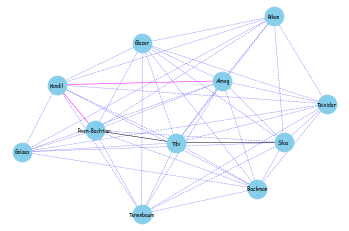

Number of communities: 3


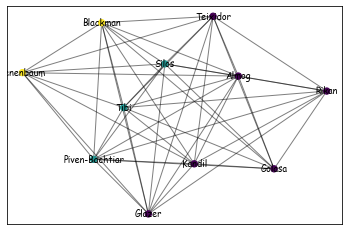

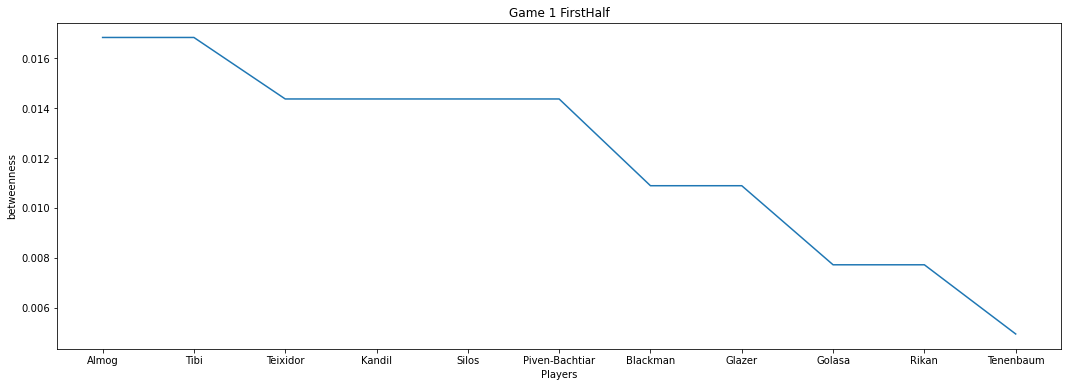

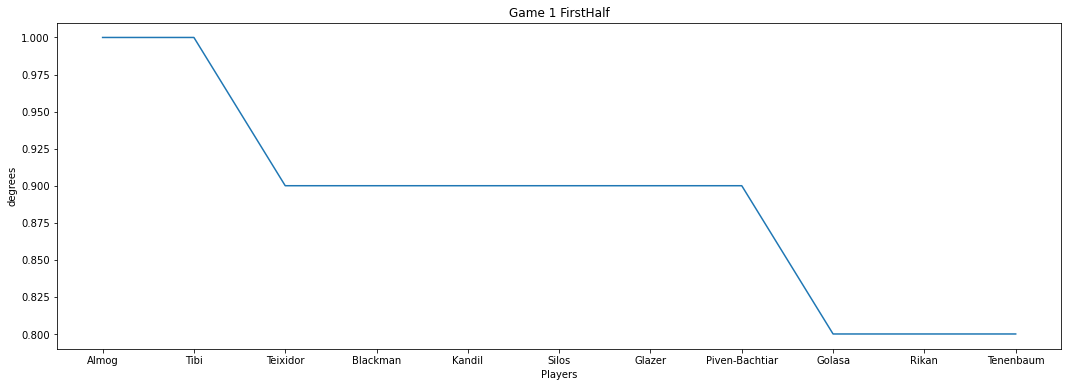

MemoryError: In RendererAgg: Out of memory

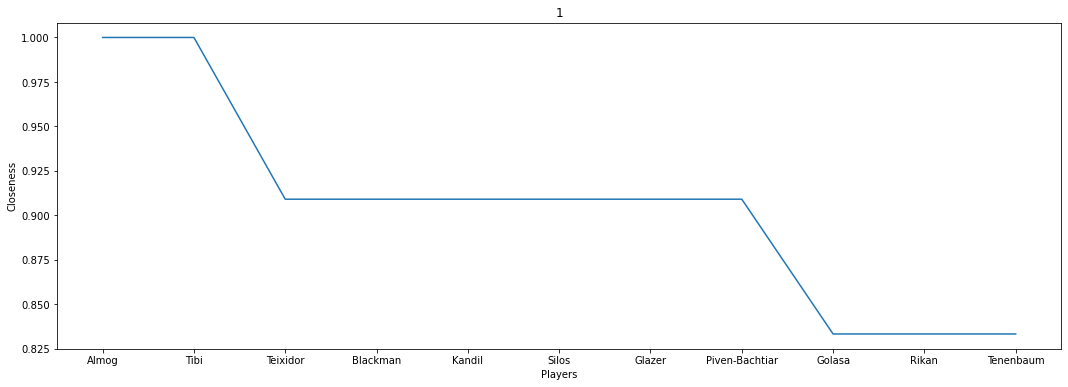

In [11]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import math
import xml.etree.ElementTree as ET

file = 1
# 36 games enter to loop for every game
while file < 37:
    print("Game number : " + str(file))
#orgenaize data
    tree = ET.parse(str(file) + '.xml')
    root = tree.getroot()
    organizeData(root, file)
#first half 
    print("In game " + str(file) + " in first half MTA got " + str(chancesPerGameFirstMTA.get(str(file))) + " chances.")
    print("In game " + str(file) + " in first half opponent got " + str(chancesPerGameFirstOpponent.get(str(file))) + " chances.")
    G_fristHalf = createNetwork(teamPassesListFirstHalf, 'FirstHalf', str(file))
    Louvain(G_fristHalf)
    betweennes(G_fristHalf, 'FirstHalf', str(file))
    degree(G_fristHalf, 'FirstHalf', str(file))
    closenes(G_fristHalf, 'FirstHalf', str(file))

#second half
    print("In game " + str(file) + " in second half MTA got " + str(chancesPerGameSecondMTA.get(str(file))) + " chances.")
    print("In game " + str(file) + " in first half opponent got " + str(chancesPerGameSecondOpponent.get(str(file))) + " chances.")
    G_secondHalf = createNetwork(teamPassesListSecondHalf, 'SecondHalf', str(file))
    Louvain(G_secondHalf)
    betweennes(G_secondHalf, 'SecondHalf', str(file))
    degree(G_secondHalf, 'SecondHalf', str(file))
    closenes(G_secondHalf, 'SecondHalf', str(file))

    file = file + 1


print("Finished!")

In [ ]:
#compute average Betweenneess and 
computeAverageBetweennessFirstHalf(averagePlayersBetweenesFirsrHalf)
computeAverageBetweennessSecondHalf(averagePlayersBetweenesSecondHalf)
computeAverageDegreeFirstHalf(averagePlayersDegreeFirstHalf)
computeAverageDegreeSecondHalf(averagePlayersDegreeSecondHalf)


In [ ]:
def computeChances(chances):
    totalChances = 0
    for game,chances in chances.items():
        totalChances = totalChances + chances
    return totalChances
        

In [ ]:
#pritnt total season numbers and graphs
print("Total season MTA chances 1 half: " + str(computeChances(chancesPerGameFirstMTA)))
print("Total season MTA chances 2 half: " + str(computeChances(chancesPerGameSecondMTA)))
print("Total season opponents chances 1 half: " + str(computeChances(chancesPerGameFirstOpponent)))
print("Total season opponents chances 2 half: " + str(computeChances(chancesPerGameSecondOpponent)))  
print(" ")
print("Betwenneess average per player")
GenereateSeasoneBetweennessGraph(totalBetweennessFirstHalf, "first half")
GenereateSeasoneBetweennessGraph(totalBetweennessSecondHalf, "second half")
print("Degree average per player")
GenereateSeasoneDegreeGraph(totalDegreeFirstHalf, "first half")
GenereateSeasoneDegreeGraph(totalDegreeSecondHalf, "second half")  

In [ ]:
pip install python-louvain